(adaptive-step-size-control-section)=
# Adaptive step size control

The implementations of the Runge-Kutta methods that we have used previously in this chapter have used a constant value of the step length $h$. Using a fixed step length does not allow the method to take advantage of increasing $h$ where the behaviour of the solution allows. Adaptive step size control is a method that attempts to control the value of $h$ based on accuracy requirements. The accuracy of the approximation to the solution to the ODE is dependent upon three factors: 

- the order of accuracy of the computational method;
- the size of the step length h used to advance the solution;
- the behaviour of the solution.
  
Improving the order of accuracy of the method is often not straightforward and can place restrictions on the applicability of the method. Reducing the step length used will improve the accuracy of the approximation but since more steps are required to advance through the domain, this will increase the computational cost. The behaviour of the solution will have an affect on the accuracy of the approximation because computational methods are more accurate where the solution is slowly varying and less accurate where there are rapid variations in the solution.

With adaptive step size control we compute two solutions of the ODE over a single step using a step length $h$ using an order $p$ method and an order $p+1$ method and calculate the difference between the two solutions. If this difference is less than a desired accuracy we say that the step has **succeeded** else we say that the step has **failed**. If the step was successful we increase $h$ and move to the next step. If the step had failed we decrease $h$ and repeat the same step. 

## Calculating the new step length

At each step in the method we will be adjusting the value of the step length $h$. If a step has failed we want to reduce the value of $h$ so that the solution using the $p$ order method is more accurate and therefore closer to the $p+1$ order solution. If a step has succeeded this indicates the the step length used could have been larger so we want to increase $h$ but not too much as to result in a failed step in the next step.

Let $y^{(p)}$ and $y^{(p+1)}$ denote the numerical solutions calculated using the order $p$ and $p+1$ method respectively and $y$ denote the exact solution then 

$$ \begin{align*}
    y &= y^{(p)} + O(h^{p+1}), \\
    y &= y^{(p+1)} + O(h^{p+2}).
\end{align*} $$

Subtracting the second equation from the first gives

$$ \begin{align*}
    0 &= y^{(p)} - y^{(p+1)} + O(h^{p+1}) + O(h^{p+2}) \\
    |y^{(p+1)} - y^{(p)}| &= O(h^{p+1}) + O(h^{p+2}).
\end{align*} $$

If we let $\Delta = |y^{(p)} - y^{(p+1)}|$ and since $O(h^{p+1}) + O(h^{p+2}) = O(h^{p+1})$ (the larger error dominates the smaller one) then by the definition of $O(h^n)$

$$ \Delta = Ch^{p+1}. $$

We want to calculate a new step length $h_{new}$ which results in a desired accuracy tolerance $tol$, i.e.,

$$ tol = Ch_{new}^{p+1},$$

and defining a ratio $r$ between the new step length and current step length, $r = h_{new} / h$, then

$$ \begin{align*}
    \frac{Ch_{new}^{p+1}}{Ch^{p+1}} &= \frac{tol}{\Delta} \\
    r^{p+1} &= \frac{tol}{\Delta} \\
    r &= \left( \frac{tol}{\Delta} \right)^{1/(p+1)}.
\end{align*} $$

If $\Delta > tol$ then we need to recalculate the current step which incurs additional computational cost. To guard against this as much as possible a *safety factor* is usually introduced into the computation. If $h_{new}$ is the estimated step size to to give $\Delta = tol$ then some smaller value, such as $0.9r$ is typically used instead. Another consideration is that for robustness we do not want the step length to change too much from one step to the next so we limit $r$ so that it is in the range $[\frac{1}{2}, 2]$, i.e.,

$$ r = \max\left(0.5, \min \left(2, 0.9 \left( \dfrac{tol}{\Delta} \right) ^{1/(p+1)} \right) \right). $$

## Embedded Runge-Kutta methods

German mathematician Erwin Fehlberg (1911 - 1990) derived a Runge-Kutta method where different weightings applied to the stage values can result in a method of fourth or fifth-order without having to repeat the calculations of the ODE function. Since Fehlberg's original method, several other Runge-Kutta methods that use the same stage values for producing solutions of different orders have been suggested and these methods are known as <a href="https://en.wikipedia.org/wiki/List_of_Runge%E2%80%93Kutta_methods#Embedded_methods" target="_blank">**embedded Runge-Kutta methods**</a>.

The Butcher tableau for an embedded Runge-Kutta method takes the form 

$$ \begin{align*}
    \begin{array}{c|ccccc}
        0 & 0 \\
        c_2 & a_{21} \\
        c_3 & a_{31} & a_{32} \\
        \vdots & \vdots & \vdots & \ddots \\
        c_s & a_{s1} & a_{s2} & \cdots & a_{s,s-1} \\ \hline
        & b_1 & b_2 & \cdots & b_{s-1} & b_s \\
        & b_1^* & b_2^* & \cdots & b_{s-1}^* & b_s^*
    \end{array}
\end{align*} $$

Where the weights $b_i$ and $b_i^*$ that give an order $p+1$ and $p$ method respectively, i.e.,

$$ \begin{align*}
    y_{n+1}^{(p+1)} &= y_n + h (b_1 k_1 + b_2 k_2 + \cdots + b_s k_s), \\
    y_{n+1}^{(p)} &= y_n + h (b_1^* k_1 + b_2^* k_2 + \cdots + b_s^* k_s),
\end{align*} $$

where $k_i$ are the same for both equations. Some common embedded methods are defined below.

```{prf:definition} Fehlberg's order 4(5) Runge-Kutta method (RKF45)
:label: fehlbergs-method-equation

$$ \begin{array}{c|cccccc}
    0 & 0 \\
    1/4 & 1/4 \\
    3/8 & 3/32 & 9/32 \\
    12/13 & 1932/2197 & -7200/2197 & 7296/2197 \\
    1 & 439/216 & -8 & 3680/513 & -845/4104 \\
    1/2 & -8/27 & 2 & -3544/2565 & 1859/4104 & -11/40 \\ \hline
    & 16/135 & 0 & 6656/12825 & 28561/56430 & -9/50 & 2/55 \\
    & 25/216 & 0 & 1408/2565 & 2197/4104 & -1/5 & 0 
\end{array} $$

{cite:t}`fehlberg:1969`
```

```{prf:definition} Cash-Karp order 4(5) Runge-Kutta method (RKCK45)
:label: cash-karp-method-equation

$$ \begin{array}{c|cccccc}
    0 & 0 \\
    1/5 & 1/5 \\
    3/10 & 3/40 & 9/40 \\
    3/5 & 3/10 & -9/10 & 6/5 \\
    1 & -11/54 & 5/2 & -70/27 & 35/27 \\
    7/8 & 1631/55296 & 175/512 & 575/13824 & 44275/110592 & 253/4096 \\ \hline
    & 37/378 & 0 & 250/621 & 125/594 & 0 & 512/1771 \\
    & 2825/27648 & 0 & 18575/48384 & 13525/55296 & 277/14336 & 1/4
\end{array} $$

{cite:t}`cash:1990`
```

```{prf:algorithm} Solving an IVP using a single step method with adaptive step size control
:label: step-size-control-algorithm

**Inputs** A first-order ODE of the form $y' = f(t,y)$, a domain $t \in [t_0, t_{\max}]$, an initial value $y(t_0) = y_0$, an initial value of the step length $h$ and a desired accuracy tolerance $tol$.

**Outputs** $(t_0, t_1, \ldots)$ and $(y_0, y_1, \ldots)$.

- $n \gets 0$
- While $t_n < b$
    - $h \gets \min(h, b - t_{n})$
    - Calculate $y^{(p+1)}$ and $y^{(p)}$ solutions
    - $\Delta \gets  \max | y^{(p+1)} - y^{(p)} |$
    - If $\Delta < tol$
      - $y_{n+1} \gets y^{(p+1)}$
      - $t_{n+1} \gets t_n + h$
      - $n \gets n + 1$
    - $h \gets \max\left(0.5, \min \left(2, 0.9 \left( \dfrac{tol}{\Delta} \right) ^{1/(p+1)} \right) \right)$
- Return $(t_0, t_1, \ldots)$ and $(y_0, y_1, \ldots)$
```

````{prf:example}
:label: embedded-rk-example

The Bogacki-Shampine 2(3) embedded Runge-Kutta method has the Butcher tableau

$$ \begin{align*}
    \begin{array}{c|cccc}
        0 & \\
        1/2 & 1/2 \\
        3/4 & 0 & 3/4 \\
        1 & 2/9 & 1/3 & 4/9 \\ \hline
        & 2/9 & 1/3 & 4/9 & 0 \\
        & 7/24 & 1/4 & 1/3 & 1/8
    \end{array}
\end{align*} $$

where the first row of $b$ values gives a third-order method and the second row gives a second-order method. Compute the first step of the Bogacki-Shampine method for the following initial value problem using an initial step length of $h_0 = 0.1$ and an accuracy tolerance of $tol = 10^{-4}$

$$ y' = -21 y + e^{-t}, \qquad t \in [0, 1], \qquad y(0) = 0.$$ 

```{dropdown} Solution (click to show)
Calculating the stage values

$$ \begin{align*}
    k_1 &= f(t_0, y_0) 
    = -21 y_0 + e^{-t_0} \\
    &= -21(0) + e^{-0} = 1, \\
    k_2 &= f(t_0 + \tfrac{1}{2}h, y_0 + \tfrac{1}{2}hk_1) 
    = -21 (y_0 + \tfrac{1}{2}hk_1 ) + e^{-(t_0 + \tfrac{1}{2}h)}\\
    &= -21(0 + \tfrac{1}{2}(0.1)(1)) + e^{-(0 + \tfrac{1}{2}(0.1))} \\
    &= -0.098771, \\
    k_3 &= f(t_0 + \tfrac{3}{4}h, y_0 + \tfrac{3}{4}hk_2) 
    = -21 (y_0 + \tfrac{3}{4}hk_2) + e^{-(t_0 + \tfrac{3}{4}h)}\\
    &= -21(0 + \tfrac{3}{4}(0.1)(-0.098771)) + e^{-(0 + \tfrac{3}{4}(0.1))} \\
    &= 1.083307, \\
    k_4 &= f(t_0 + h, y_0 + h(\tfrac{2}{9} k_1 + \tfrac{1}{3} k_2 + \tfrac{4}{9} k_3))  \\
    &= -21 (y_0 + h(\tfrac{2}{9} k_1 + \tfrac{1}{3} k_2 + \tfrac{4}{9} k_3)) + e^{-(t_0 + h)}\\
    &= -21(0 + 0.1(\tfrac{2}{9}(1) + \tfrac{1}{3}(-0.098771) + \tfrac{4}{9}(1.083307))) + e^{-(0 + 0.1)} \\
    &= -0.503777.
\end{align*} $$

Calculate $y^{(3)}$ and $y^{(2)}$

$$ \begin{align*}
    y^{(3)} &= y_0 + \frac{h}{9}(2 k_1 + 3k_2 + 4 k_3) \\
    &= 0 + \frac{0.1}{9}(2 (1) + 3(-0.098771) + 4 (1.083307)) \\
    &= 0.067077, \\
    y^{(2)} &= y_0 + \frac{h}{24} (7k_1 + 6 k_2 + 8 k_3 + 3 k_4) \\
    &= 0 + \frac{0.1}{24} (7 (1) + 6(-0.098771) + 8(1.083307) + 3(-0.503777)) \\
    &= 0.056510.
\end{align*} $$

Calculate $\Delta$

$$ \begin{align*} 
    \Delta &= | y^{(3)} - y^{(2)} | = | 0.067077 - 0.056510 | = 0.010566.
\end{align*} $$

$\Delta = 0.010566 > 10^{-4}$ so the step has failed. Recalculating $h$

$$ \begin{align*}
    h &= 0.1 \max \left( 0.5, \min \left( 2, 0.9 \left( \frac{10^{-4}}{0.010566} \right)^{1/3} \right) \right) \\
    &= 0.1 \max ( 0.5, \min (2, 0.190373 )) \\
    &= 0.05.
\end{align*} $$

Calculating the stage values using the new value of $h = 0.05$

$$ \begin{align*}
    k_1 &= f(t_0, y_0) 
    = -21 y_0 + e^{-t_0} \\
    &= -21(0) + e^{-0} = 1, \\
    k_2 &= f(t_0 + \tfrac{1}{2}h, y_0 + \tfrac{1}{2}hk_1)
    = -21 (y_0 + \tfrac{1}{2}hk_1 ) + e^{-(t_0 + \tfrac{1}{2}h)}\\
    &= -21(0 + \tfrac{1}{2}(0.05)(1)) + e^{-(0 + \tfrac{1}{2}(0.05))} \\
    &= 0.450310, \\
    k_3 &= f(t_0 + \tfrac{3}{4}h, y_0 + \tfrac{3}{4}hk_2) 
    = -21 (y_0 + \tfrac{3}{4}hk_2) + e^{-(t_0 + \tfrac{3}{4}h)}\\
    &= -21(0 + \tfrac{3}{4}(0.05)(0.450310)) + e^{-(0 + \tfrac{3}{4}(0.05))} \\
    &= 0.608575, \\
    k_4 &= f(t_0 + h, y_0 + h(\tfrac{2}{9} k_1 + \tfrac{1}{3} k_2 + \tfrac{4}{9} k_3)) \\
    &= -21 (y_0 + h(\tfrac{2}{9} k_1 + \tfrac{1}{3} k_2 + \tfrac{4}{9} k_3)) + e^{-(t_0 + h)}\\
    &= -21(0 + 0.05(\tfrac{2}{9}(1) + \tfrac{1}{3}(0.450310) + \tfrac{4}{9}(0.608575))) + e^{-(0 + 0.05)} \\
    &= 0.276286.
\end{align*} $$

Calculate $y^{(3)}$ and $y^{(2)}$

$$ \begin{align*}
    y^{(3)} &= y_0 + \frac{h}{9}(2 k_1 + 3k_2 + 4 k_3) \\
    &= 0 + \frac{0.05}{9}(2 (1) + 3(-0.098771) + 4 (1.083307)) \\
    &= 0.032140, \\
    y^{(2)} &= y_0 + \frac{h}{24} (7k_1 + 6 k_2 + 8 k_3 + 3 k_4) \\
    &= 0 + \frac{0.05}{24} (7 (1) + 6(-0.098771) + 8(1.083307) + 3(-0.503777)) \\
    &= 0.032082.
\end{align*} $$

Calculate $\Delta$

$$ \begin{align*} 
    \Delta &= | y^{(3)} - y^{(2)} | = | 0.032140 - 0.032082 | = 5.83 \times 10^{-5}.
\end{align*} $$

$\Delta = 5.83 \times 10^{-5} < 10^{-4}$ so the step has been successful and $y_1 = y^{(3)} = 0.032140$.

Calculate the new value of $h$ for the next step

$$ \begin{align*}
    h &= 0.05 \max \left( 0.5, \min \left( 2, 0.9 \left( \frac{10^{-4}}{5.83 \times 10^{-5}} \right)^{1/3} \right) \right) \\
    &= 0.05 \max ( 0.5, \min (2, 1.077605)) \\
    &= 0.053880.
\end{align*} $$

The solution to this initial value problem using the Bogacki-Shampine 2(3) method is shown in the table below along with the step lengths used for each step.

| $n$  |  $t_n$  |   $y_n$   |   $h_n$   |
|:--:|:---------:|:---------:|:---------:|
|  0 |  0.000000 |  0.000000 |     -     |
|  1 |  0.050000 |  0.032140 |  0.050000 |
|  2 |  0.103880 |  0.040939 |  0.053880 |
|  3 |  0.161862 |  0.041599 |  0.057982 |
|  4 |  0.239599 |  0.039342 |  0.077737 |
|  5 |  0.333844 |  0.035754 |  0.094244 |
|  6 |  0.466041 |  0.031259 |  0.132197 |
|  7 |  0.598661 |  0.027477 |  0.132620 |
|  8 |  0.725978 |  0.024064 |  0.127317 |
|  9 |  0.852679 |  0.021364 |  0.126701 |
| 10 |  0.962172 |  0.019014 |  0.109494 |
| 11 |  1.000000 |  0.018354 |  0.037828 |
```
````

---

(ssc-code-section)=

##  Code

The code below defines the function `rkf45()` which computes the solution to an initial value problem using Fehlberg's 4(5) embedded Runge-Kutta method. Since we do not know beforehand how many steps will be required we assume the number steps will be large a while loop instead of a for loop for stepping through the solution. 

`````{tab-set}
````{tab-item} Python
```python
def rkf45(f, tspan, y0, h, tol=1e-4):

    t = np.zeros(100000)
    if type(y0) == list:
        y = np.zeros((100000,len(y0)))
    else:
        y = np.zeros((100000, 1))

    t[0] = tspan[0]
    y[0,:] = y0

    n = 0
    while t[n] < tspan[-1]:

        h = min(h, tspan[-1] - t[n])

        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + 1/4 * h, y[n,:] + 1/4 * h * k1)
        k3 = f(t[n] + 3/8 * h, y[n,:] + h * (3/32 * k1 + 9/32 * k2))
        k4 = f(t[n] + 12/13 * h, y[n,:] + h * (1932/2197 * k1 - 7200/2197 * k2 + 7296/2197 * k3))
        k5 = f(t[n] + h, y[n,:] + h * (439/216 * k1 - 8 * k2 + 3680/513 * k3 - 845/4104 * k4))
        k6 = f(t[n] + 1/2 * h, y[n,:] + h * (-8/27 * k1 + 2 * k2 - 3544/2565 * k3 + 1859/4104 * k4 - 11/40 * k5))

        y5 = y[n,:] + h * (16/135 * k1 + 6656/12825 * k3 + 28561/56430 * k4 - 9/50 * k5 + 2/55 * k6)
        y4 = y[n,:] + h * (25/216 * k1 + 1408/2565 * k3 + 2197/4104 * k4 - 1/5 * k5);

        delta = np.max(np.abs(y5 - y4))
        if delta < tol:
            y[n+1,:] = y5
            t[n+1] = t[n] + h
            n += 1
        
        h *= max(0.5, min(2, 0.9 * (tol / delta) ** 0.2))

    return t[:n+1], y[:n+1,:]
```
````

````{tab-item} MATLAB
```matlab
function [t, y] = rkf45(f, tspan, y0, h, tol)

t = zeros(100000, 1);
if length(y0) > 1
    y = zeros(length(t), length(y0));
else
    y = zeros(length(t), 1);
end
t(1) = tspan(1);
y(1,:) = y0;

n = 1;
while t(n) < tspan(2)
    
    h = min(tspan(2) - t(n), h);

    k1 = f(t(n), y(n, :));
    k2 = f(t(n) + 1/4 * h, y(n, :) + 1/4 * h * k1);
    k3 = f(t(n) + 3/8 * h, y(n, :) + h * (3/32 * k1 + 9/32 * k2));
    k4 = f(t(n) + 12/13 * h, y(n, :) + h * (1932/2197 * k1 - 7200/2197 * k2 + 7296/2197 * k3));
    k5 = f(t(n) + h, y(n, :) + h * (439/216 * k1 - 8 * k2 + 3680/513 * k3 - 845/4104 * k4));
    k6 = f(t(n) + 1/2 * h, y(n, :) + h * (-8/27 * k1 + 2 * k2 - 3544/2565 * k3 + 1859/4104 * k4 - 11/40 * k5));
    
    y5 = y(n, :) + h * (16/135 * k1 + 6656/12825 * k3 + 28561/56430 * k4 - 9/50 * k5 + 2/55 * k6);
    y4 = y(n, :) + h * (25/216 * k1 + 1408/2565 * k3 + 2197/4104 * k4 - 1/5 * k5);

    delta = max(abs(y5 - y4));
    if delta < tol
        y(n+1,:) = y5;
        t(n+1) = t(n) + h;
        n = n + 1;
    end

    h = h * max(0.5, min(2, 0.9 * (tol / delta) ^ 0.2));

end

t(n+1:end) = [];
y(n+1:end, :) = [];

end
```

````
`````

Fehlberg's method has been applied to solve the initial value problem from {prf:ref}`embedded-rk-example` and the solution is plotted in {numref}`rkf45-example-figure`. The solution had 11 successful steps, 3 failed steps and a total of 84 function evaluations.

```{glue:figure} rkf45-example-plot
:name: rkf45-example-figure

Fehlberg method solution to the initial value problem $y' = -21y + e^{-t}$, $t\in [0,1]$, $y(0)=0$ using Fehlberg's method with an initial step length $h=0.1$ and an accuracy tolerance $tol=10^{-4}$.
```


| $n$ |   $t_n$   |   $y_n$   |    $h_n$  |
|:---:|:---------:|:---------:|:---------:|
|  0  |  0.000000 |  0.000000 |     -     |
|  1  |  0.043854 |  0.027970 |  0.043854 |
|  2  |  0.088018 |  0.037931 |  0.044165 |
|  3  |  0.141141 |  0.040854 |  0.053123 |
|  4  |  0.204556 |  0.040083 |  0.063415 |
|  5  |  0.283425 |  0.037540 |  0.078869 |
|  6  |  0.387418 |  0.033929 |  0.103993 |
|  7  |  0.527599 |  0.029477 |  0.140182 |
|  8  |  0.675002 |  0.025435 |  0.147403 |
|  9  |  0.832414 |  0.021723 |  0.157412 |
| 10  |  0.993711 |  0.018489 |  0.161297 |
| 11  |  1.000000 |  0.018375 |  0.006289 |


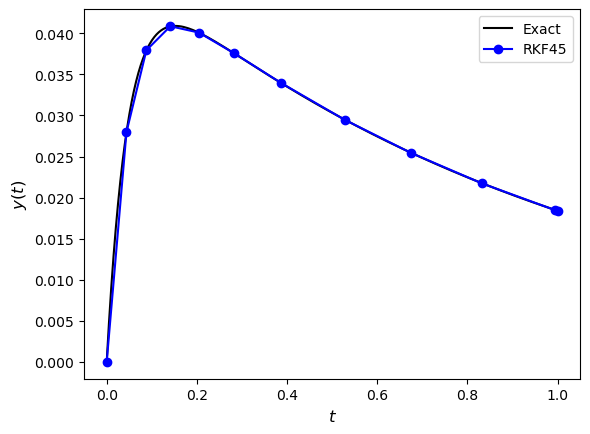

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def rkf45(f, tspan, y0, h, tol=1e-4):

    t = np.zeros(100000)
    if type(y0) == list:
        y = np.zeros((100000,len(y0)))
    else:
        y = np.zeros((100000, 1))

    t[0] = tspan[0]
    y[0,:] = y0

    n = 0
    while t[n] < tspan[-1]:

        h = min(h, tspan[-1] - t[n])

        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + 1/4 * h, y[n,:] + 1/4 * h * k1)
        k3 = f(t[n] + 3/8 * h, y[n,:] + h * (3/32 * k1 + 9/32 * k2))
        k4 = f(t[n] + 12/13 * h, y[n,:] + h * (1932/2197 * k1 - 7200/2197 * k2 + 7296/2197 * k3))
        k5 = f(t[n] + h, y[n,:] + h * (439/216 * k1 - 8 * k2 + 3680/513 * k3 - 845/4104 * k4))
        k6 = f(t[n] + 1/2 * h, y[n,:] + h * (-8/27 * k1 + 2 * k2 - 3544/2565 * k3 + 1859/4104 * k4 - 11/40 * k5))
        
        y5 = y[n,:] + h * (16/135 * k1 + 6656/12825 * k3 + 28561/56430 * k4 - 9/50 * k5 + 2/55 * k6)
        y4 = y[n,:] + h * (25/216 * k1 + 1408/2565 * k3 + 2197/4104 * k4 - 1/5 * k5);

        delta = np.max(np.abs(y5 - y4))
        if delta < tol:
            y[n+1,:] = y5
            t[n+1] = t[n] + h
            n += 1
        
        h *= max(0.5, min(2, 0.9 * (tol / delta) ** 0.2))

    return t[:n+1], y[:n+1,:]


def rkbs23(f, tspan, y0, h, tol=1e-4):
    
    t = np.zeros(100000)
    if type(y0) == list:
        y = np.zeros((100000,len(y0)))
    else:
        y = np.zeros((100000, 1))

    t[0] = tspan[0]
    y[0,:] = y0

    n = 0
    while t[n] < tspan[-1]:

        h = min(h, tspan[-1] - t[n])

        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + 1/2 * h, y[n,:] + 1/2 * h * k1)
        k3 = f(t[n] + 3/4 * h, y[n,:] + 3/4 * h * k2)
        k4 = f(t[n] + h, y[n,:] + h * (2/9 * k1 + 1/3 * k2 + 4/9 * k3))
        y3 = y[n,:] + h * (2/9 * k1 + 1/3 * k2 + 4/9 * k3)
        y2 = y[n,:] + h * (7/24 * k1 + 1/4 * k2 + 1/3 * k3 + 1/8 * k4)

        delta = np.max(np.abs(y3 - y2))
        if delta < tol:
            y[n+1,:] = y3
            t[n+1] = t[n] + h
            n += 1
        
        h *= max(0.5, min(2, 0.9 * (tol / delta) ** 0.2))

    return t[:n+1], y[:n+1,:]

    
# Define the ODE function and exact solution
def f(t, y):
    return -21 * y + np.exp(-t)


def exact(t):
    return 1/20 * np.exp(-21 * t) * (np.exp(20 * t) - 1)


# Define IVP
tspan = [0, 1]  # boundaries of the t domain
y0 = 0        # solution at the lower boundary
h = 0.1         # initial step length
tol = 1e-4      # accuracy tolerance

# Calculate the solution to the IVP
t_rkbs23, y_rkbs23 = rkbs23(f, tspan, y0, h, tol)
t_rkf45, y_rkf45 = rkf45(f, tspan, y0, h, tol)

# Print table of solution values
print("\n| $n$ |   $t_n$   |   $y_n$   |    $h_n$  |")
print("|:---:|:---------:|:---------:|:---------:|")
print(f"|  0  | {t_rkf45[0]:9.6f} | {y_rkf45[0,0]:9.6f} |     -     |")
for n in range(1,len(t_rkf45)):
    print(f"| {n:2d}  | {t_rkf45[n]:9.6f} | {y_rkf45[n,0]:9.6f} | {t_rkf45[n] - t_rkf45[n-1]:9.6f} |")

# Plot solutions
t_exact = np.linspace(tspan[0], tspan[1], 200)
y_exact = exact(t_exact)
fig, ax = plt.subplots()
plt.plot(t_exact, y_exact, "k", label="Exact")
plt.plot(t_rkf45, y_rkf45, "bo-", label="RKF45")
plt.xlabel("$t$", fontsize=12)
plt.ylabel("$y(t)$", fontsize=12)
plt.legend()

from myst_nb import glue
glue('rkf45-example-plot', fig, display=False)